In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25'

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

# Define the input size for ResNet50V2
IMG_SIZE = (224, 224)
BATCH_SIZE = 512

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Use ResNet50V2's preprocessing
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

# Load training data
train_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
)
# Load and preprocess test images
test_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test',  # Path to the test dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 5846 images belonging to 7 classes.
Found 647 images belonging to 7 classes.
Found 717 images belonging to 7 classes.


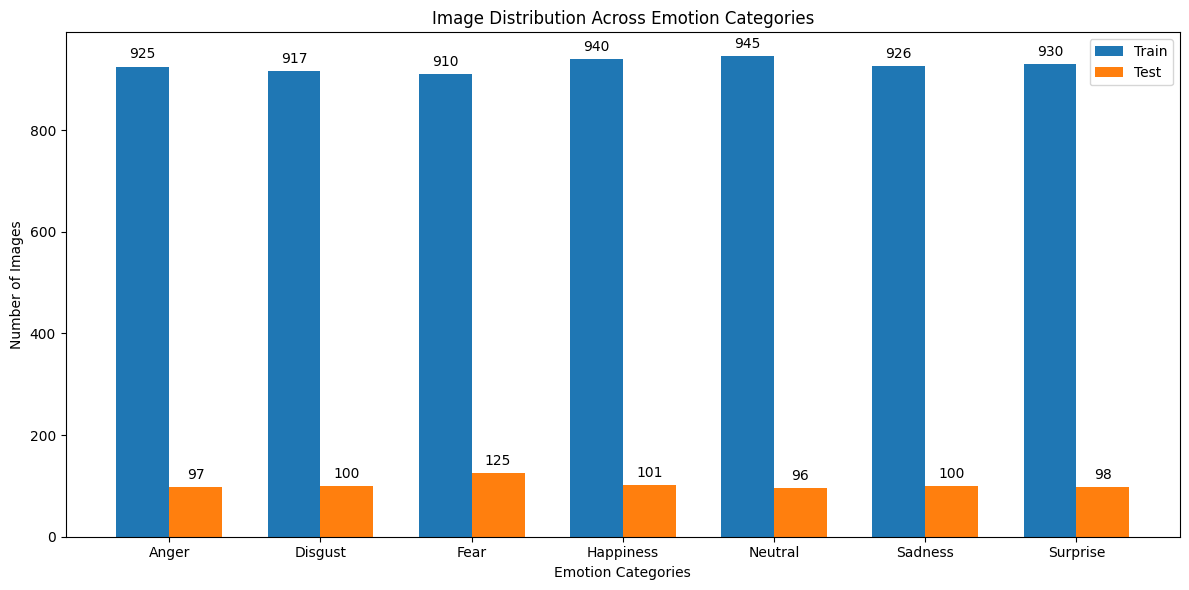

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Define your data paths
train_data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train'
test_data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test'

# Define your emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Initialize counts for each category
train_counts = {emotion: 0 for emotion in emotion_categories}
test_counts = {emotion: 0 for emotion in emotion_categories}

# Count images in train dataset
for emotion in emotion_categories:
    emotion_path = os.path.join(train_data_path, emotion)
    train_counts[emotion] = len(os.listdir(emotion_path))

# Count images in test dataset
for emotion in emotion_categories:
    emotion_path = os.path.join(test_data_path, emotion)
    test_counts[emotion] = len(os.listdir(emotion_path))

df = pd.DataFrame({
    'Emotion': emotion_categories,
    'Train Count': list(train_counts.values()),
    'Test Count': list(test_counts.values())
})

# Get the positions for the bars
x = np.arange(len(emotion_categories))
width = 0.35  # Width of the bars

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, df['Train Count'], width, label='Train')
rects2 = ax.bar(x + width/2, df['Test Count'], width, label='Test')

# Add labels, title, and legend
ax.set_xlabel('Emotion Categories')
ax.set_ylabel('Number of Images')
ax.set_title('Image Distribution Across Emotion Categories')
ax.set_xticks(x)
ax.set_xticklabels(emotion_categories)
ax.legend()

# Add count labels using the provided code snippet
for index, row in df.iterrows():
    plt.text(x=index - width/2, y=row['Train Count'] + 10, s=str(row['Train Count']), ha='center', va='bottom', fontsize=10)
    plt.text(x=index + width/2, y=row['Test Count'] + 10, s=str(row['Test Count']), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

In [5]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def plot_sample_images(img_paths, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_path in enumerate(img_paths[:num_images]):
        img = Image.open(img_path)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.show()

# Define your data paths and emotion categories
data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train'  # Replace with your actual path
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Loop through each emotion category and plot sample images
for emotion in emotion_categories:
    emotion_path = os.path.join(data_path, emotion)
    img_paths = [os.path.join(emotion_path, img) for img in os.listdir(emotion_path)[:5]]  # Get 5 sample images
    plot_sample_images(img_paths, [emotion] * len(img_paths))

Output hidden; open in https://colab.research.google.com to view.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Define data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Add rotation
    width_shift_range=0.2,  # Add width shift
    height_shift_range=0.2, # Add height shift
    brightness_range=[0.8, 1.2], # Add brightness adjustmen
    shear_range=0.2,  # Apply shearing for data augmentation
    zoom_range=0.2,   # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'
)

# Define your data paths and emotion categories
data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train'  # Replace with your actual path
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Loop through each emotion category and plot sample images
for emotion in emotion_categories:
    emotion_path = os.path.join(data_path, emotion)
    # Get one sample image from each category
    img_path = os.path.join(emotion_path, os.listdir(emotion_path)[0])

    # Load a single image and apply augmentation
    img = Image.open(img_path).resize((224, 224))
    # Convert the image to RGB if it's not already
    img = img.convert('RGB')
    img = np.array(img)
    img = img.reshape((1, 224, 224, 3))

    # Use __next__() instead of next() and get the first item from the batch
    augmented_imgs = [datagen.flow(img, batch_size=1).__next__()[0] for _ in range(5)]

    fig, axes = plt.subplots(1, 6, figsize=(20, 5))
    axes[0].imshow(img[0].astype('uint8'))  # Original image
    axes[0].set_title(f"Original {emotion} Image")

    for i, aug_img in enumerate(augmented_imgs):
        # Rescale augmented image to 0-255 and convert to uint8
        aug_img = (aug_img * 255).astype('uint8')
        axes[i + 1].imshow(aug_img)
        axes[i + 1].set_title(f"Augmented {emotion} image {i+1}")

    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [7]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam

# Create Precision and Recall metrics outside the function
precision_metric = Precision()
recall_metric = Recall()

# Custom F1-score metric
def f1_score(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)  # Use pre-created metric
    recall = recall_metric(y_true, y_pred)      # Use pre-created metric
    f1 = 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
    return f1

# Apply mixed precision for faster training and less GPU load
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Load pre-trained ResNet50V2 model without the top classification layer
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to retain pre-trained weights
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
# Apply the output layer to the previous layer's output
output = Dense(7, activation='softmax')(x)  # 7 classes: anger, disgust, fear, happiness, neutral, sadness and surprise

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cast (Cast)               │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ cast[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├──────────────────────

 Total params: 24,617,479 (93.91 MB)

 Trainable params: 1,052,679 (4.02 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)

In [10]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3747s 341s/step - accuracy: 0.1361 - f1_score: 0.1362 - loss: 13.7467 - precision: 0.1363 - recall: 0.1361 - val_accuracy: 0.1445 - val_f1_score: 0.1347 - val_loss: 13.7738 - val_precision: 0.1445 - val_recall: 0.1445
Epoch 2/30
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.1406 - f1_score: 0.1352 - loss: 13.6113 - precision: 0.1409 - recall: 0.1406

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 623ms/step - accuracy: 0.1406 - f1_score: 0.1352 - loss: 13.6113 - precision: 0.1409 - recall: 0.1406 - val_accuracy: 0.1523 - val_f1_score: 0.1364 - val_loss: 13.6623 - val_precision: 0.1523 - val_recall: 0.1523
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.1412 - f1_score: 0.1374 - loss: 13.7342 - precision: 0.1413 - recall: 0.1412 - val_accuracy: 0.1504 - val_f1_score: 0.1393 - val_loss: 13.6941 - val_precision: 0.1504 - val_recall: 0.1504
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 756ms/step - accuracy: 0.1211 - f1_score: 0.1386 - loss: 14.1338 - precision: 0.1211 - recall: 0.1211 - val_accuracy: 0.1562 - val_f1_score: 0.1393 - val_loss: 13.5996 - val_precision: 0.1562 - val_recall: 0.1562
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.1434 - f1_score: 0.1398 - loss: 13.7794 - precision: 0.1434 - recall: 0.1434 - val_accuracy: 0.1406 - val_f1_score: 0.1400 - val_loss: 13.8515 - val_precision: 0.1406 - val_recall: 0.1406

In [11]:
# Evaluate the model and unpack the returned values appropriately
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(validation_generator)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 10s/step - accuracy: 0.1423 - f1_score: 0.1418 - loss: 13.8241 - precision: 0.1423 - recall: 0.1423
Test Accuracy: 14.22%


In [12]:
# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Use a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)

# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,  # Add more epochs for fine-tuning
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 219s 11s/step - accuracy: 0.1349 - f1_score: 0.1417 - loss: 7.4525 - precision: 0.1352 - recall: 0.1349 - val_accuracy: 0.1445 - val_f1_score: 0.1419 - val_loss: 13.7766 - val_precision: 0.1445 - val_recall: 0.1445
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 625ms/step - accuracy: 0.1211 - f1_score: 0.1418 - loss: 7.5032 - precision: 0.1213 - recall: 0.1211 - val_accuracy: 0.1445 - val_f1_score: 0.1418 - val_loss: 13.7646 - val_precision: 0.1445 - val_recall: 0.1445
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 74s 7s/step - accuracy: 0.1462 - f1_score: 0.1417 - loss: 5.7048 - precision: 0.1471 - recall: 0.1181 - val_accuracy: 0.1406 - val_f1_score: 0.1404 - val_loss: 4.5908 - val_precision: 0.1507 - val_recall: 0.1230
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 783ms/step - accuracy: 0.2243 - f1_score: 0.1402 - loss: 1.9017 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1504 - val_f1_score: 0.1402 - val_loss: 3.9090 - val_precision: 0.1667 - val

In [13]:
# Evaluate the model and unpack the returned values appropriately
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(validation_generator)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.6985 - f1_score: 0.3915 - loss: 1.5528 - precision: 0.7040 - recall: 0.6969
Test Accuracy: 70.02%


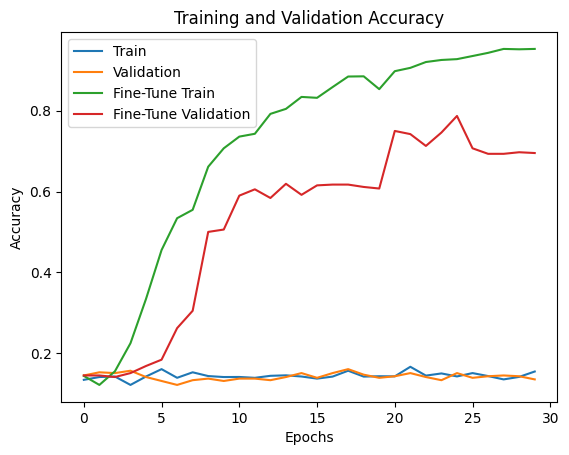

In [14]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(fine_tune_history.history['accuracy'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_accuracy'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

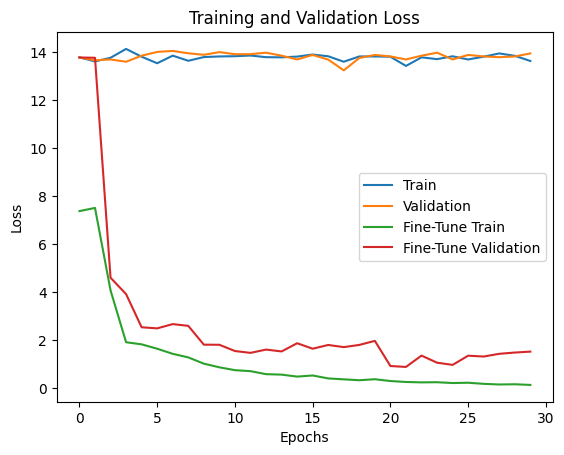

In [15]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.plot(fine_tune_history.history['loss'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_loss'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

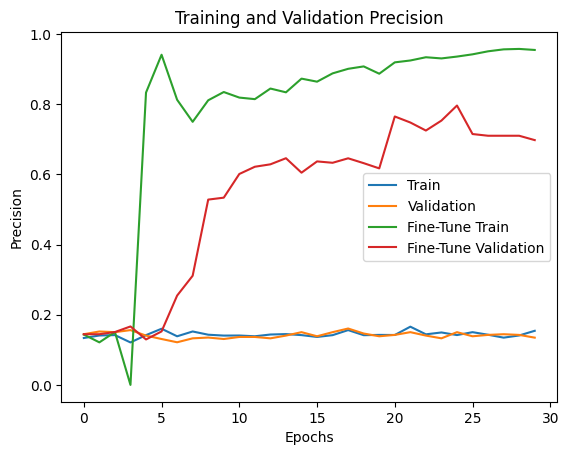

In [16]:
# Plot training & validation loss
plt.plot(history.history['precision'], label='Train')
plt.plot(history.history['val_precision'], label='Validation')
plt.plot(fine_tune_history.history['precision'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_precision'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Training and Validation Precision')
plt.show()

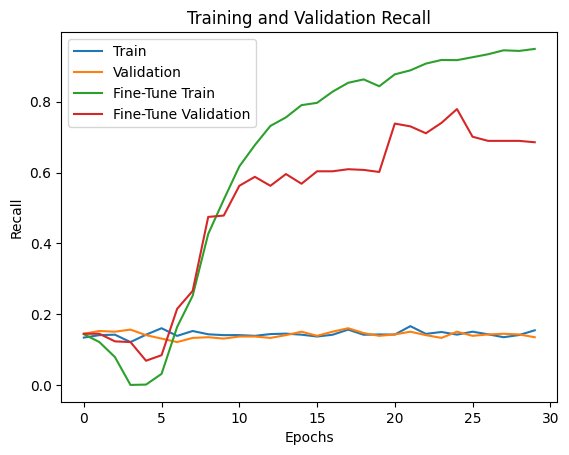

In [17]:
# Plot training & validation loss
plt.plot(history.history['recall'], label='Train')
plt.plot(history.history['val_recall'], label='Validation')
plt.plot(fine_tune_history.history['recall'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_recall'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Training and Validation Recall')
plt.show()

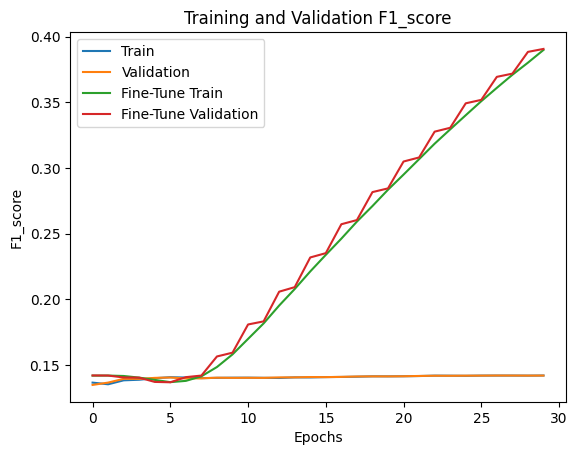

In [20]:
# Plot training & validation f1_score
plt.plot(history.history['f1_score'], label='Train')
plt.plot(history.history['val_f1_score'], label='Validation')
plt.plot(fine_tune_history.history['f1_score'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_f1_score'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('F1_score')
plt.legend()
plt.title('Training and Validation F1_score')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━

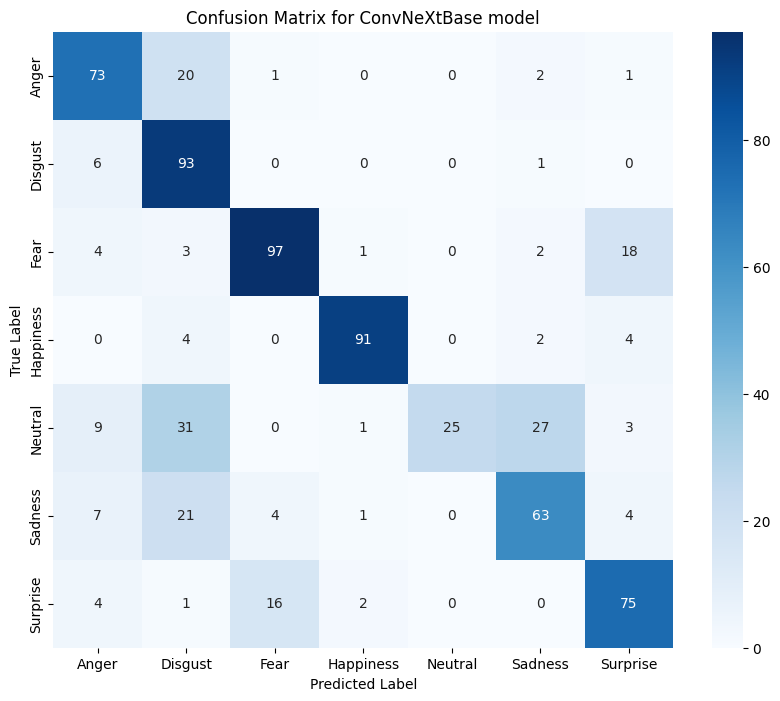

In [21]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define your emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Initialize empty lists to store all predicted and true emotions
all_predicted_emotions = []
all_true_emotions = []

# Loop through each emotion category
for emotion in emotion_categories:
    # Define the path to the emotion folder
    emotion_folder_path = os.path.join('/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test', emotion)

    # Get a list of all image files in the emotion folder
    image_files = [f for f in os.listdir(emotion_folder_path) if os.path.isfile(os.path.join(emotion_folder_path, f))]

    # Loop through each image file and make a prediction
    for image_file in image_files:
        # Construct the full path to the image
        img_path = os.path.join(emotion_folder_path, image_file)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Make the prediction
        prediction = model.predict(img_array)

        # Get the predicted class index and emotion label
        predicted_class_index = np.argmax(prediction)
        predicted_emotion = emotion_categories[predicted_class_index]

        # Append the predicted and true emotions to the lists
        all_predicted_emotions.append(predicted_emotion)
        all_true_emotions.append(emotion)  # True emotion is the current emotion category

# Convert the lists to NumPy arrays
all_predicted_emotions = np.array(all_predicted_emotions)
all_true_emotions = np.array(all_true_emotions)

# Create the confusion matrix
cm_all_emotions = confusion_matrix(all_true_emotions, all_predicted_emotions, labels=emotion_categories)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_all_emotions, annot=True, fmt="d", cmap="Blues",
            xticklabels=emotion_categories, yticklabels=emotion_categories)
plt.title("Confusion Matrix for ResNet50V2 model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [22]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.efficientnet import preprocess_input

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Path to your Test folder
test_folder_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test'

true_labels = []
predicted_labels = []

# Loop through each emotion category folder in the Test folder
for emotion_index, emotion in enumerate(emotion_categories):
    emotion_folder_path = os.path.join(test_folder_path, emotion)

    # Loop through images in the emotion folder
    for image_file in os.listdir(emotion_folder_path):
        img_path = os.path.join(emotion_folder_path, image_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Make prediction
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)

        # Append labels
        true_labels.append(emotion_index)  # Use emotion_index for true label
        predicted_labels.append(predicted_class_index)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=range(len(emotion_categories)))

# Print TP, FP, TN, FN for each emotion
for emotion_index, emotion in enumerate(emotion_categories):
    TP = cm[emotion_index, emotion_index]
    FP = sum(cm[i, emotion_index] for i in range(len(emotion_categories)) if i != emotion_index)
    FN = sum(cm[emotion_index, i] for i in range(len(emotion_categories)) if i != emotion_index)
    TN = sum(cm[i, j] for i in range(len(emotion_categories)) for j in range(len(emotion_categories)) if i != emotion_index and j != emotion_index)

    print(f"For {emotion} Emotion:")
    print("True Positives (TP):", TP)
    print("False Positives (FP):", FP)
    print("True Negatives (TN):", TN)
    print("False Negatives (FN):", FN)
    print("-" * 20)  # Separator between emotions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

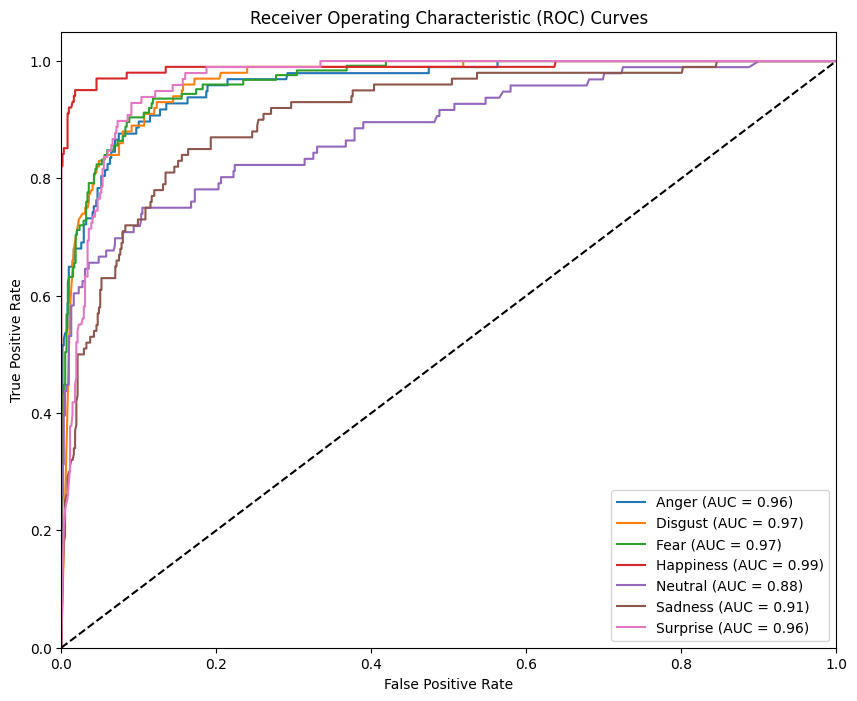

In [23]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Path to your Test folder
test_folder_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test'

# Initialize lists to store true and predicted probabilities for each class
true_labels = []
predicted_probabilities = []

# Loop through each emotion category folder in the Test folder
for emotion_index, emotion in enumerate(emotion_categories):
    emotion_folder_path = os.path.join(test_folder_path, emotion)

    # Loop through images in the emotion folder
    for image_file in os.listdir(emotion_folder_path):
        img_path = os.path.join(emotion_folder_path, image_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Make prediction (get probabilities)
        prediction = model.predict(img_array)[0]  # Get probabilities for all classes

        # Append true label (one-hot encoded) and predicted probabilities
        true_label = np.zeros(len(emotion_categories))
        true_label[emotion_index] = 1  # One-hot encoding
        true_labels.append(true_label)
        predicted_probabilities.append(prediction)

# Convert lists to NumPy arrays
true_labels = np.array(true_labels)
predicted_probabilities = np.array(predicted_probabilities)

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(emotion_categories)):
    fpr, tpr, _ = roc_curve(true_labels[:, i], predicted_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{emotion_categories[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [24]:
model.save('/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25_ResNet50V2.h5')

In [25]:
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.7 MB/s eta 0:00:00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


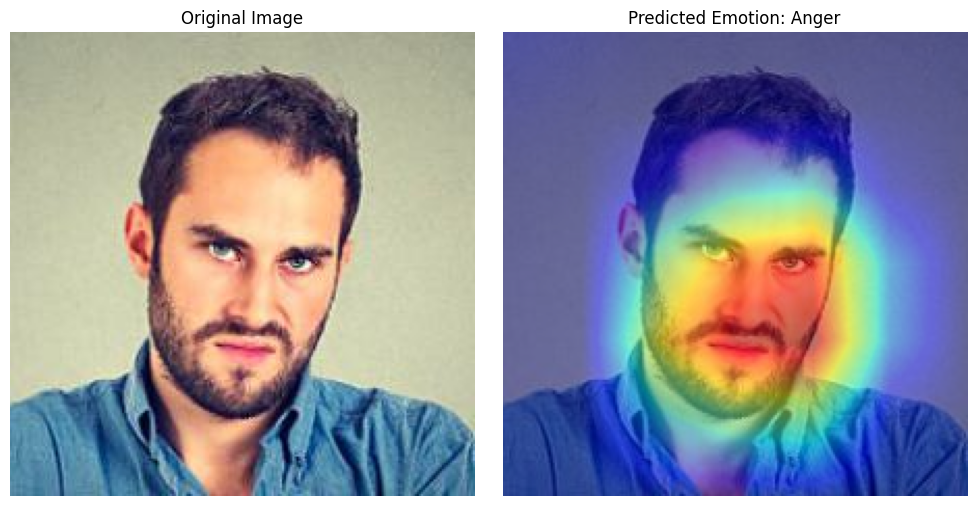

In [26]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

def grad_cam_heatmap(model, image, layer_name='conv5_block3_out'):
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Load and preprocess the image
img_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Train/Anger/anger_802.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Generate heatmap
heatmap = grad_cam_heatmap(model, x)
heatmap = np.uint8(255 * heatmap[0])

# Display the original and heatmap overlaid images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original Image
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Heatmap Overlay
axes[1].imshow(img)
axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
axes[1].set_title(f"Predicted Emotion: {emotion_categories[np.argmax(model.predict(x))]}")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [27]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import random

def grad_cam_heatmap(model, image, layer_name=model.layers[-3].name): # Get the name of the penultimate layer dynamically
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test'

# Loop through each emotion category
for emotion in emotion_categories:
    print(f"Processing emotion: {emotion}")
    emotion_path = os.path.join(data_path, emotion)
    img_names = os.listdir(emotion_path)

    if len(img_names) < 3:
        print(f"Skipping {emotion}, not enough images.")
        continue

    img_paths = random.sample([os.path.join(emotion_path, img) for img in img_names], 3)

    # Process 3 randomly selected images per emotion
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        heatmap = grad_cam_heatmap(model, x) # Now calls the function with updated penultimate_layer
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [28]:
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.applications.efficientnet import preprocess_input

# ... (other imports and definitions remain the same)

def grad_cam_heatmap(model, image, layer_name='conv5_block3_out'):
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Set the path to the folder containing images
folder_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/bean'  # Replace with your folder path

# Get a list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Process each image in the folder
for image_file in image_files:
    # Construct the full path to the image
    img_path = os.path.join(folder_path, image_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Generate heatmap
    heatmap = grad_cam_heatmap(model, x)
    heatmap = np.uint8(255 * heatmap[0])

    # Display the original and heatmap overlaid images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Original Image
    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Heatmap Overlay
    axes[1].imshow(img)
    axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
    axes[1].set_title(f"Predicted Emotion: {emotion_categories[np.argmax(model.predict(x))]}")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [29]:
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.applications.efficientnet import preprocess_input

# ... (other imports and definitions remain the same)

def grad_cam_heatmap(model, image, layer_name='conv5_block3_out'):
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Set the path to the folder containing images
folder_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/celeb'  # Replace with your folder path

# Get a list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Process each image in the folder
for image_file in image_files:
    # Construct the full path to the image
    img_path = os.path.join(folder_path, image_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Generate heatmap
    heatmap = grad_cam_heatmap(model, x)
    heatmap = np.uint8(255 * heatmap[0])

    # Display the original and heatmap overlaid images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Original Image
    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Heatmap Overlay
    axes[1].imshow(img)
    axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
    axes[1].set_title(f"Predicted Emotion: {emotion_categories[np.argmax(model.predict(x))]}")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [30]:
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.applications.efficientnet import preprocess_input

# ... (other imports and definitions remain the same)

def grad_cam_heatmap(model, image, layer_name='conv5_block3_out'):
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Set the path to the folder containing images
folder_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/Football'  # Replace with your folder path

# Get a list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Process each image in the folder
for image_file in image_files:
    # Construct the full path to the image
    img_path = os.path.join(folder_path, image_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Generate heatmap
    heatmap = grad_cam_heatmap(model, x)
    heatmap = np.uint8(255 * heatmap[0])

    # Display the original and heatmap overlaid images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Original Image
    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Heatmap Overlay
    axes[1].imshow(img)
    axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
    axes[1].set_title(f"Predicted Emotion: {emotion_categories[np.argmax(model.predict(x))]}")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [31]:
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.applications.efficientnet import preprocess_input

# ... (other imports and definitions remain the same)

def grad_cam_heatmap(model, image, layer_name='conv5_block3_out'):
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Set the path to the folder containing images
folder_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/mixed'  # Replace with your folder path

# Get a list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Process each image in the folder
for image_file in image_files:
    # Construct the full path to the image
    img_path = os.path.join(folder_path, image_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Generate heatmap
    heatmap = grad_cam_heatmap(model, x)
    heatmap = np.uint8(255 * heatmap[0])

    # Display the original and heatmap overlaid images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Original Image
    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Heatmap Overlay
    axes[1].imshow(img)
    axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
    axes[1].set_title(f"Predicted Emotion: {emotion_categories[np.argmax(model.predict(x))]}")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [32]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import random

def grad_cam_plus_plus_heatmap(model, image, layer_name=None):
    # Get the name of the penultimate layer dynamically if not provided
    if layer_name is None:
        layer_name = model.layers[-3].name  # Using the penultimate layer dynamically

    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

data_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/FER_25/Test'

# Loop through each emotion category
for emotion in emotion_categories:
    print(f"Processing emotion: {emotion}")
    emotion_path = os.path.join(data_path, emotion)
    img_names = os.listdir(emotion_path)

    if len(img_names) < 3:
        print(f"Skipping {emotion}, not enough images.")
        continue

    img_paths = random.sample([os.path.join(emotion_path, img) for img in img_names], 3)

    # Process 3 randomly selected images per emotion
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        heatmap = grad_cam_plus_plus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [33]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus  # Import GradCAM++
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

def grad_cam_plus_plus_heatmap(model, image, layer_name=None):
    # Get the name of the penultimate layer dynamically if not provided
    if layer_name is None:
        layer_name = model.layers[-3].name  # Using the penultimate layer dynamically

    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)  # Initialize GradCAM++

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)  # Get heatmap
    cam = normalize(cam)
    return cam

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Specify the folder containing images
folder_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/bean'  # Replace with your folder path

# Loop through images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions if needed
        img_path = os.path.join(folder_path, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)  # Assuming you have preprocess_input defined

        heatmap = grad_cam_plus_plus_heatmap(model, x)  # Now uses dynamic layer name
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [34]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus  # Import GradCAM++
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

def grad_cam_plus_plus_heatmap(model, image, layer_name=None):
    # Get the name of the penultimate layer dynamically if not provided
    if layer_name is None:
        layer_name = model.layers[-3].name  # Using the penultimate layer dynamically

    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)  # Initialize GradCAM++

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)  # Get heatmap
    cam = normalize(cam)
    return cam

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Specify the folder containing images
folder_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/celeb'  # Replace with your folder path

# Loop through images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions if needed
        img_path = os.path.join(folder_path, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)  # Assuming you have preprocess_input defined

        heatmap = grad_cam_plus_plus_heatmap(model, x)  # Now uses dynamic layer name
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [35]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus  # Import GradCAM++
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

def grad_cam_plus_plus_heatmap(model, image, layer_name=None):
    # Get the name of the penultimate layer dynamically if not provided
    if layer_name is None:
        layer_name = model.layers[-3].name  # Using the penultimate layer dynamically

    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)  # Initialize GradCAM++

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)  # Get heatmap
    cam = normalize(cam)
    return cam

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Specify the folder containing images
folder_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/Football'  # Replace with your folder path

# Loop through images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions if needed
        img_path = os.path.join(folder_path, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)  # Assuming you have preprocess_input defined

        heatmap = grad_cam_plus_plus_heatmap(model, x)  # Now uses dynamic layer name
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [36]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus  # Import GradCAM++
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

def grad_cam_plus_plus_heatmap(model, image, layer_name=None):
    # Get the name of the penultimate layer dynamically if not provided
    if layer_name is None:
        layer_name = model.layers[-3].name  # Using the penultimate layer dynamically

    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)  # Initialize GradCAM++

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)  # Get heatmap
    cam = normalize(cam)
    return cam

# Define emotion categories
emotion_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Specify the folder containing images
folder_path = '/content/drive/My Drive/Facial_Emotion_Recognition_Project/mixed'  # Replace with your folder path

# Loop through images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions if needed
        img_path = os.path.join(folder_path, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)  # Assuming you have preprocess_input defined

        heatmap = grad_cam_plus_plus_heatmap(model, x)  # Now uses dynamic layer name
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_emotion = emotion_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Emotion: {predicted_emotion}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.